# HW2 - Jingwen Li

In [277]:
from scipy.optimize import fsolve, root_scalar
from scipy.stats import norm, multivariate_normal, rv_continuous
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.integrate import quad
import warnings
warnings.filterwarnings("ignore")

# Q1

In [278]:
PD1 = 0.5
PD2 = 0.4
PD3 = 0.3
PD4 = 0.2
PD5 = 0.1

In [279]:
def simulation(corr, size):
    sample = np.random.multivariate_normal(mean = [0,0,0,0,0],cov=corr, size = size)
    df_simulation = pd.DataFrame(sample, columns=['Firm 1', 'Firm 2', 'Firm 3', 'Firm 4', 'Firm 5'])
    df_simulation['Firm 1'] = (df_simulation['Firm 1'] < norm.ppf(PD1)).astype(int)
    df_simulation['Firm 2'] = (df_simulation['Firm 2'] < norm.ppf(PD2)).astype(int)
    df_simulation['Firm 3'] = (df_simulation['Firm 3'] < norm.ppf(PD3)).astype(int)
    df_simulation['Firm 4'] = (df_simulation['Firm 4'] < norm.ppf(PD4)).astype(int)
    df_simulation['Firm 5'] = (df_simulation['Firm 5'] < norm.ppf(PD5)).astype(int)
    df_simulation['Defaults'] = df_simulation.sum(axis=1)
    mean = df_simulation['Defaults'].mean()
    std = df_simulation['Defaults'].std()
    
    return mean, std, df_simulation

### Part 1

In [280]:
corr_matrix_1 = [[1, 0.05, 0.1, 0.15, 0.2],[0.05, 1, 0.25, 0.30, 0.35], [0.10, 0.25, 1, 0.40, 0.45],[0.15, 0.30, 0.40, 1, 0.50],[0.20, 0.35, 0.45, 0.50,1]]

In [281]:
mean, std, df = simulation(corr_matrix_1, 10000)
print(f'mean is {mean.round(1)}')
print(f'std is {std.round(1)}')

mean is 1.5
std is 1.2


### Part 2

In [282]:
corr_matrix_2 = [[1, 0, 0, 0, 0],[0, 1, 0, 0, 0], [0, 0, 1, 0, 0],[0, 0, 0, 1, 0],[0, 0, 0, 0,1]]

In [283]:
mean, std, df = simulation(corr_matrix_2, 10000)
print(f'mean is {mean.round(1)}')
print(f'std is {std.round(2)}')

mean is 1.5
std is 0.97


# Q2

In [284]:
l = []
for i in range(1000):
    rho = np.random.uniform(0, 0.95)
    corr_matrix = [[1, rho, rho, rho, rho],[rho, 1, rho, rho, rho], [rho, rho, 1, rho, rho],[rho, rho, rho, 1, rho],[rho, rho, rho, rho,1]]
    mean, std, df = simulation(corr_matrix, 10000)
    l.append([rho, std])
df = pd.DataFrame(l, columns=['rho', 'std'])

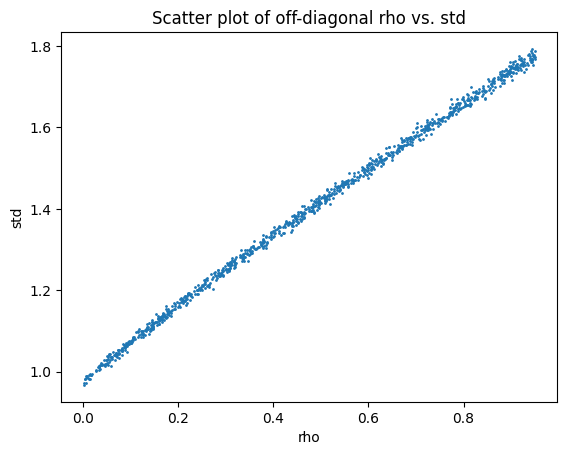

In [285]:
# Create a scatter plot of x vs. y
plt.scatter(df['rho'], df['std'], s=1)

# Set the axis labels and plot title
plt.xlabel('rho')
plt.ylabel('std')
plt.title('Scatter plot of off-diagonal rho vs. std')

# Display the plot
plt.show()

# Q3

In [306]:
PD1 = 0.1
PD2 = 0.2
PD3 = 0.3
PD4 = 0.4
PD5 = 0.5

### Q3-1: 

In [307]:
corr_matrix = [[1, 0.15, 0.2, 0.25, 0.3],[0.15, 1, 0.25, 0.3, 0.35],[0.2, 0.25, 1, 0.35, 0.4],[0.25, 0.3, 0.35, 1, 0.45],[0.3, 0.35, 0.4, 0.45, 1]]

In [308]:
mean, std, df = simulation(corr_matrix, 10000)

In [309]:
df['PDJ45'] = df['Firm 4'] + df['Firm 5'] == 2

In [310]:
df

,Firm 1,Firm 2,Firm 3,Firm 4,Firm 5,Defaults,PDJ45
0,0,0,0,0,1,1,False
1,0,0,1,1,1,3,True
2,0,0,0,0,1,1,False
3,0,0,1,0,0,1,False
4,0,0,0,0,0,0,False
...,...,...,...,...,...,...,...
9995,0,1,0,0,0,1,False
9996,1,0,0,0,1,2,False
9997,0,0,0,1,0,1,False
9998,0,0,0,0,1,1,False


In [311]:
PDJ45 = df['PDJ45'].sum()/df.shape[0]
print(f'Prob[ D4 = 1 and D5 = 1] = {PDJ45.round(2)}')

Prob[ D4 = 1 and D5 = 1] = 0.27


### Q3-2

In [312]:
prior = df[df['Firm 3'] == 1]
prior

,Firm 1,Firm 2,Firm 3,Firm 4,Firm 5,Defaults,PDJ45
1,0,0,1,1,1,3,True
3,0,0,1,0,0,1,False
6,0,0,1,1,1,3,True
9,0,0,1,1,1,3,True
11,0,0,1,1,1,3,True
...,...,...,...,...,...,...,...
9973,1,0,1,1,1,4,True
9983,0,1,1,1,0,3,False
9988,0,0,1,1,1,3,True
9989,0,1,1,0,0,2,False


In [313]:
PDJ45_PD3 = prior['PDJ45'].sum()/prior.shape[0]
print(f'Prob[ D4 = 1 and D5 = 1 | D3 = 1] = {PDJ45_PD3.round(2)}.')

Prob[ D4 = 1 and D5 = 1 | D3 = 1] = 0.45.


### Q3-3

In [314]:
df['loss'] = df['Firm 1'] * 0.1 * 700 + df['Firm 2'] * 0.2 * 600 + df['Firm 3'] * 0.3 *  500 + df['Firm 4'] * 0.4 * 400 + df['Firm 5'] * 0.5 * 300 + df['Firm 4'] * 0.6 * 200 + df['Firm 5'] * 0.7 * 100
loss_rate = df['loss'].mean()/2800
print(f'The porfolio expected loss rate is {loss_rate.round(2)}.')

The porfolio expected loss rate is 0.11.


### Q3-4

In [295]:
df.corr()

,Firm 1,Firm 2,Firm 3,Firm 4,Firm 5,Defaults,PDJ45,loss
Firm 1,1.000000,0.070582,0.101094,0.119388,0.132546,0.393703,0.155746,0.250867
Firm 2,0.070582,1.000000,0.149954,0.165914,0.215204,0.533193,0.207166,0.427347
Firm 3,0.101094,0.149954,1.000000,0.227661,0.252641,0.614190,0.274850,0.549007
Firm 4,0.119388,0.165914,0.227661,1.000000,0.286233,0.655813,0.737307,0.780168
Firm 5,0.132546,0.215204,0.252641,0.286233,1.000000,0.688194,0.617367,0.719100
Defaults,0.393703,0.533193,0.614190,0.655813,0.688194,1.000000,0.722733,0.968843
PDJ45,0.155746,0.207166,0.274850,0.737307,0.617367,0.722733,1.000000,0.805394
loss,0.250867,0.427347,0.549007,0.780168,0.719100,0.968843,0.805394,1.000000


In [296]:
corr_D3_D4 = df.corr().iloc[2][3]

In [297]:
print(f'The correlation between D3 and D4 is {corr_D3_D4.round(2)}.')

The correlation between D3 and D4 is 0.23.


# Q4

In [298]:
PD1 = 0.1
PD2 = 0.2

In [299]:
# from 
mean = [5/8, 11/24]
var = [13/192, 47/576]
corr = (3/611)**(1/2)
cov = 1/192
cov_matrix = [[var[0], cov], [cov, var[1]]]

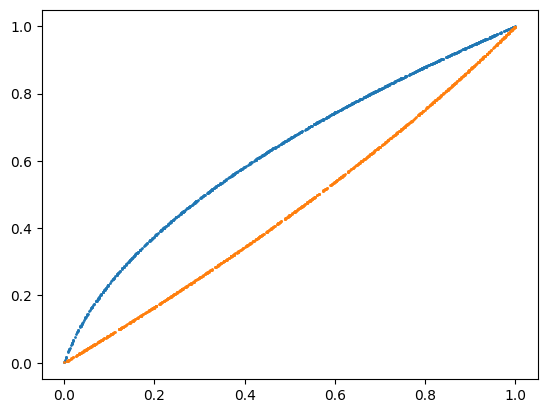

In [300]:
def Fxy(x,y):
    return 1/4 * x * (2 + 3 * x - y) * y

# Define the inverse marginal CDFs inv_Fx(u) and inv_Fy(v)
def inv_Fx(x):
    return 1/6 * (-1 + (1 + 48 * x)**(1/2))

def inv_Fy(y):
    return 1/2 * (5 - (25 - 16 * y)**(1/2))

x = np.random.uniform(0, 1, size = 1000)
y = np.random.uniform(0, 1, size = 1000)

plt.scatter(x, inv_Fx(x), s=1)
plt.scatter(y, inv_Fy(y), s=1)

In [304]:
x = inv_Fx(0.1)
y = inv_Fy(0.2)
PDJ = Fxy(x,y)
print(f'PDJ is {round(PDJ,3)}.')

PDJ is 0.025.


In [305]:
Dcorr = (PDJ - PD1 * PD2)/(PD1*(1-PD1)*PD2*(1-PD2))**(1/2)
print(f'Dcorr is {round(Dcorr,3)}.')

Dcorr is 0.039.


In [302]:
def f(rho):
    inv_pd1 = norm.ppf(PD1)
    inv_pd2 = norm.ppf(PD2)
    f = multivariate_normal(mean=[0, 0], cov=[[1, rho], [rho, 1]]).cdf([inv_pd2, inv_pd1]) - PDJ
    return f

rho = fsolve(f, 0)
print(f'rho is {round(rho[0],3)}.')

rho is 0.09.
